Machine learning using PyTorch


Machine learning - artificial intelligence that enables computer to learn patterns and make predictions

Reinforcement learning - Go is an example, learned by receiving rewards and penalties

Application of Machine Learning : Image recognition, predictie maintenance, spam detection

Neural network - desinged to recognize patterns. Three layers - input layer, hidden layers, output layers

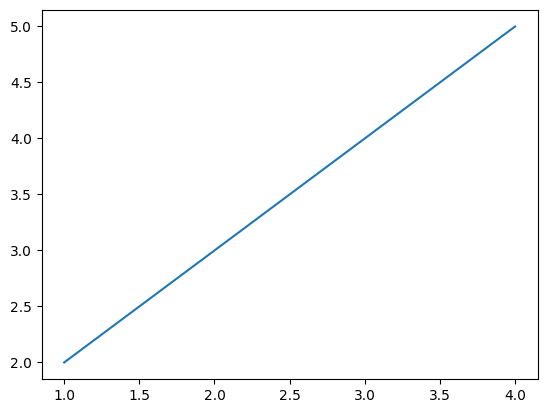

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[2,3,4,5])

In [6]:
import torch
import torch.nn as nn  #nn neural network class
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [7]:
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])  #totensor convert to pytorch to transform input


In [11]:
train_data = datasets.MNIST(root ="data", train = True, download= True, transform = transformation) #true reprsents a training data
test_data = datasets.MNIST(root ="data", train = False, download= True, transform = transformation) #MNIST is the database

Using downloaded and verified file: data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Using downloaded and verified file: data\MNIST\raw\train-labels-idx1-ubyte.gz
Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Using downloaded and verified file: data\MNIST\raw\t10k-images-idx3-ubyte.gz
Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



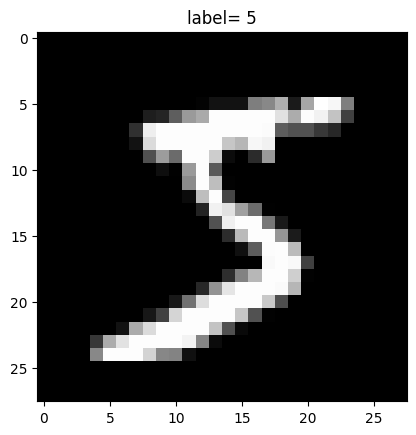

In [12]:
image,label = train_data[0]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(f'label= {label}')
plt.show()

method is the function inside the class, 

when creating the object, we initialize base class and then the derived class. simpleNN is the derived class

fc1 - fully connected

Sigmoid is time consuming, use ReLU

In [15]:
train_loader = DataLoader (train_data, batch_size= 32, shuffle = True) #batch size, batch of dta
test_loader = DataLoader (test_data, batch_size=  32, shuffle = False) #shuffle False, don't shuffle

flatten image to matrix

return x - vector of 10 values

Back propagation in neural network to lower the output of other values

loss_function will decide the weight adjustment for back propagation

In [25]:
class SimpleNN (nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()         #constructor line of the base class , INIT method how it look like
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)

    def forward(self,x):
        x = x.view (-1, 28*28)
        x = torch.relu(self.fc1(x)) #relu - rectifier linear unit #forward how to activate
        x = torch.relu (self.fc2(x))
        x = self.fc3(x)
        return x
    
    #WE NEED TWO METHOD IN THE NEURAL NETWORK





In [26]:
model = SimpleNN() #instantiate and create the object model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)  #stochastic optimization gradient descent #lr - learning rate, percentage of how weight is chaing


In [28]:
for epoch in range(5):
    running_loss = 0.0
    for images, lables in train_loader: #TRAINLOADER load 32 batch of image, seed the code above
        images_flattened = images.view(images.size(0),-1)
        optimizer.zero_grad()
        outputs = model(images_flattened)
        loss = criterion(outputs, lables)  #outputs and lables to compare
        loss.backward()
        optimizer.step() #here changes to weight happen
        running_loss += loss.item()
    print(f'Epoch {epoch}, Loss: {running_loss/len(train_loader)}')


Epoch 0, Loss: 0.4082079665899277
Epoch 1, Loss: 0.3814503879030546
Epoch 2, Loss: 0.36217612737019855
Epoch 3, Loss: 0.34744620429476103
Epoch 4, Loss: 0.33569595909118655
